In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os

# Add the PowerFactory Python API to the path # TODO: Update this path to match your PowerFactory installation
sys.path.append("C:/Program Files/DIgSILENT/PowerFactory 2024 SP4A/Python/3.12")

# Add the src directory to Python path for development
sys.path.append(os.path.join(os.getcwd(), "..")) 

import powerfactory as pf
from src.pfapi.core.Network import Network  
import src.pfapi.utils.ImportModels as ImportModels
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

# Initialize PowerFactory application and import 39-bus system model for this example
print("Initializing PowerFactory application...")
app: pf.Application = pf.GetApplicationExt()
app.Show()

# Select the example network
# File path: "grid_models\\Radial System.pfd"                IntPrj name: "Radial System" 
# File path: "grid_models\\Meshed Network.pfd"               IntPrj name: "Meshed Network"
# File path: "grid_models\\Simple Mesh 5-bus.pfd"            IntPrj name: "Simple Mesh 5-bus"
# File path: "grid_models\\39 Bus New England System.pfd"    IntPrj name: "39 Bus New England System"
pfd_file_project = "grid_models\\39 Bus New England System.pfd" # File path to the PFD file
pfd_project_name = "39 Bus New England System" # IntPrj name
project = ImportModels.import_pfd_file(app, pfd_file_project, pfd_project_name)

Initializing PowerFactory application...


In [2]:
# Initialize the Network object (reads topology and connected components)
network = Network(app, base_mva=100.0)

INFO: Processed 39 valid busbars
INFO: Running load flow analysis to obtain busbar results...
INFO: Reading network elements from PowerFactory...
INFO: Successfully read 75 classified elements from PF
INFO: Classified element counts:
INFO:   ElmLne: 34
INFO:   ElmTr2: 12
INFO:   ElmLod: 19
INFO:   ElmSym: 10


In [3]:
# Obtain network admittance matrix
from src.pfapi.utils.AdmittanceMatrix import build_admittance_matrix
import pandas as pd
Y_bus = build_admittance_matrix(network, as_dataframe=True)
Y_bus.head(10) if isinstance(Y_bus, pd.DataFrame) else None


,Bus 08,Bus 07,Bus 05,Bus 04,Bus 06,Bus 31,Bus 11,Bus 12,Bus 10,Bus 32,...,Bus 26,Bus 28,Bus 25,Bus 29,Bus 38,Bus 30,Bus 02,Bus 01,Bus 39,Bus 09
Bus 08,32.107205-333.501474j,-18.761728+215.759845j,-6.345176+ 88.832481j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,-1.738499+27.438055j
Bus 07,-18.761728+215.759845j,28.172638-324.744698j,0.000000+ 0.000000j,0.000000+ 0.000000j,-7.058825+108.235292j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000+ 0.000000j
Bus 05,-6.345176+ 88.832481j,0.000000+ 0.000000j,40.620745-548.843796j,-4.863813+ 77.821007j,-29.411756+382.352909j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000+ 0.000000j
Bus 04,0.000000+ 0.000000j,0.000000+ 0.000000j,-4.863813+ 77.821007j,17.469151-203.396477j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000+ 0.000000j
Bus 06,0.000000+ 0.000000j,-7.058825+108.235292j,-29.411756+382.352909j,0.000000+ 0.000000j,46.805735-651.509491j,0.000000+40.000000j,-10.335154+121.068941j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000+ 0.000000j
Bus 31,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 40.000000j,0.095404-49.598800j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000+ 0.000000j
Bus 11,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,-10.335154+121.068941j,0.000000+ 0.000000j,32.627291-374.483502j,-0.844412+22.957455j,-21.447725+230.563007j,0.000000+ 0.000000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000+ 0.000000j
Bus 12,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,-0.844412+ 22.957455j,1.763802-46.794644j,0.000000+ 0.000000j,0.000000+ 0.000000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000+ 0.000000j
Bus 10,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,-21.447725+230.563007j,0.000000+ 0.000000j,42.895449-511.053114j,0.000000+50.000000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000+ 0.000000j
Bus 32,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 50.000000j,0.000000-61.976048j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000+ 0.000000j


In [4]:
from src.pfapi.utils.AdmittanceMatrix import reduce_matrix
import numpy as np
import pandas as pd

# Reduce the admittance matrix to only generator buses
Y_bus = build_admittance_matrix(network, as_dataframe=False)
if not isinstance(Y_bus, np.ndarray):
    raise TypeError("Y_bus must be a numpy ndarray, but got type {}".format(type(Y_bus)))
reduced_Y_bus, generator_bus_names_order = reduce_matrix(Y_bus, network)
# pd.DataFrame(reduced_Y_bus, index=generator_bus_names_order, columns=generator_bus_names_order) # Only for printing the reduced matrix

In [5]:
from src.pfapi.core.synchro_power_coefficients import calculate_power_distribution_ratios

# Calculate synchronizing power coefficients
GEN_OUT = "G 04" # Define the geenerator name where outage occurs
ratios = calculate_power_distribution_ratios(reduced_Y_bus, generator_bus_names_order, network, GEN_OUT)

# Display the synchronizing power coefficients
print(f"Synchronizing power coefficients for outage of generator {GEN_OUT}:")
print(ratios)

INFO: Calculating synchronizing power coefficients for disturbance bus: Bus 33 at index 3


Synchronizing power coefficients for outage of generator G 04:
[0.05549655 0.0781816  0.17771765 0.         0.12511425 0.06399661
 0.15800495 0.06675982 0.11299691 0.16173166]


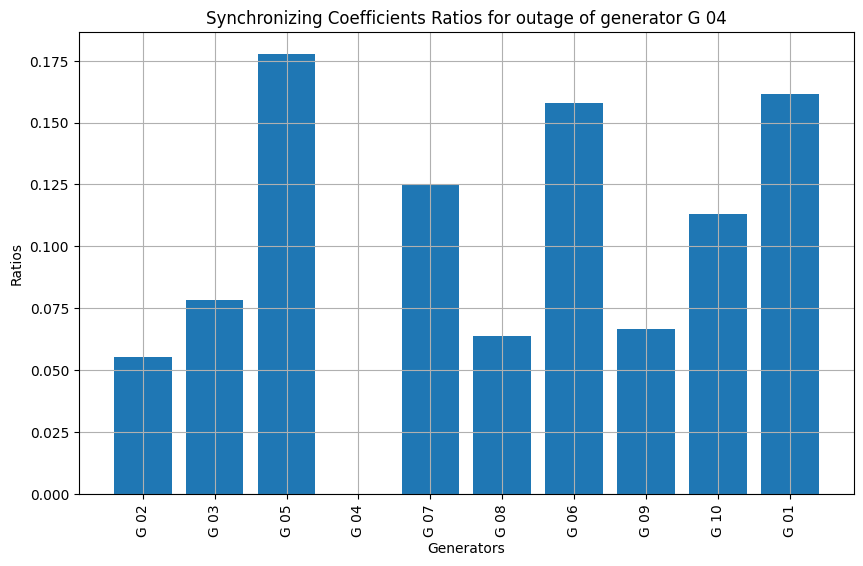

In [6]:
# Convert generator_bus_names to generator_names order
generator_names_order = [network.get_generator_name_from_busbar(bus) for bus in generator_bus_names_order]

# Plot the ratios
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(generator_names_order, ratios)
plt.xlabel('Generators')
plt.ylabel('Ratios')
plt.title('Synchronizing Coefficients Ratios for outage of generator {}'.format(GEN_OUT))
plt.xticks(rotation=90)
plt.grid(True)
plt.show()